# <u>Deepfake Video Detection Project</u>

### While running run only on GPU in sessions

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## MetaData of the DataSet


In [3]:
train_sample_metadata = pd.read_json('/content/drive/MyDrive/DL Project/metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


- Index is the Name of the Video
- Label represents the type of video it is.
 - if the label is Fake orginal column contains its orginal video name else it is None


In [4]:
train_sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, aagfhgtpmv.mp4 to eukvucdetx.mp4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     400 non-null    object
 1   split     400 non-null    object
 2   original  323 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [5]:
train_sample_metadata['label'].value_counts()

FAKE    323
REAL     77
Name: label, dtype: int64

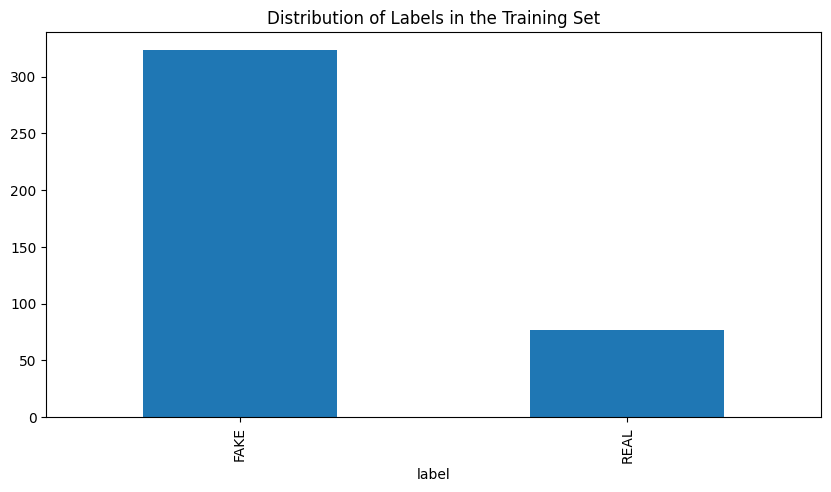

In [6]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(10, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

Unique Values

In [7]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [8]:
unique_values(train_sample_metadata)

,label,split,original
Total,400,400,323
Uniques,2,1,209


- Uniquess of label =2 tells that there are 2 unique values("FAKE", "REAL" )
- Uniquess of original =209 tells that there are 209 unique video names in the train_sample_metadata dataframe

### Most Frequent items

In [9]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequency'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))


In [10]:
most_frequent_values(train_sample_metadata)

,label,split,original
Total,400,400,323
Most frequent item,FAKE,train,atvmxvwyns.mp4
Frequency,323,400,6
Percent from total,80.75,100.0,1.858


- FAKE label is the most frequently occuring item in label column with percentage of 80.75%
- which indicates REAL label is occuring with percentage of 19.25%
- atvmxvwyns.mp4 is the most frequently occuring video

In [11]:
original_counts = pd.DataFrame(train_sample_metadata['original'].value_counts())
original_counts.head(10)

,original
atvmxvwyns.mp4,6
meawmsgiti.mp4,6
qeumxirsme.mp4,5
kgbkktcjxf.mp4,5
fysyrqfguw.mp4,4
gjypopglvi.mp4,4
dzyuwjkjui.mp4,4
gipbyjfxfp.mp4,4
ywvlvpvroj.mp4,4
qtnjyomzwo.mp4,4


### some of the Fake Video names

In [12]:
fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].sample(10).index)
fake_train_sample_video

['akvmwkdyuv.mp4',
 'avtycwsgyb.mp4',
 'cdyakrxkia.mp4',
 'duvyaxbzvp.mp4',
 'adohikbdaz.mp4',
 'cbbibzcoih.mp4',
 'dzwkmcwkwl.mp4',
 'ecnihjlfyt.mp4',
 'bguwlyazau.mp4',
 'andaxzscny.mp4']

### some of the REAL Video names

In [13]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='REAL'].sample(5).index)    # returning the index value which is video name
real_train_sample_video

['bxzakyopjf.mp4',
 'dxbqjxrhin.mp4',
 'ccfoszqabv.mp4',
 'beboztfcme.mp4',
 'dakiztgtnw.mp4']

### Function to play the video

In [14]:
from IPython.display import HTML
from base64 import b64encode

def play_video(video_file):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(video_file,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

In [15]:
play_video("/content/drive/MyDrive/DL Project/Dataset/test_sample_videos/acazlolrpz.mp4")

Output hidden; open in https://colab.research.google.com to view.

## Finding Average Frame rate of Videos

In [16]:
videos = glob.glob('/content/drive/MyDrive/DL Project/Dataset/test_sample_videos/*.mp4')
frame_cnt = []
for video in videos:
  capture = cv.VideoCapture(video)
  frame_cnt.append(int(capture.get(cv.CAP_PROP_FRAME_COUNT)))
print("Frames: ",frame_cnt)
print("Avg Frame per video: ",np.mean(frame_cnt))

Frames:  [299, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 299, 299, 300, 299, 300, 299, 300, 300, 300, 300, 299, 300, 300, 299, 300, 300, 300, 300, 300, 299, 300, 299, 300, 299, 300, 300, 299, 300, 300, 300, 299, 300, 299, 300, 300, 299, 300, 300, 300, 300, 300, 300, 299, 299, 299, 300, 300, 300, 300, 300, 299, 300, 300, 299, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 299, 299, 300, 300, 299, 300, 299, 300, 299, 299, 300, 299, 299, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 299, 299, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 299, 299, 300, 300, 300, 299, 300, 300, 300, 300, 300, 299, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 299, 300, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 299, 300, 299, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 

# Locating a Face within an Image

In [17]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=c4be5e4a0966b0e38115a2b07423db2ad9017aeda93bce320ca63a4d30129941
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [18]:
def image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path)
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   # converting the frame color to RGB
    ax.imshow(frame)

    return frame

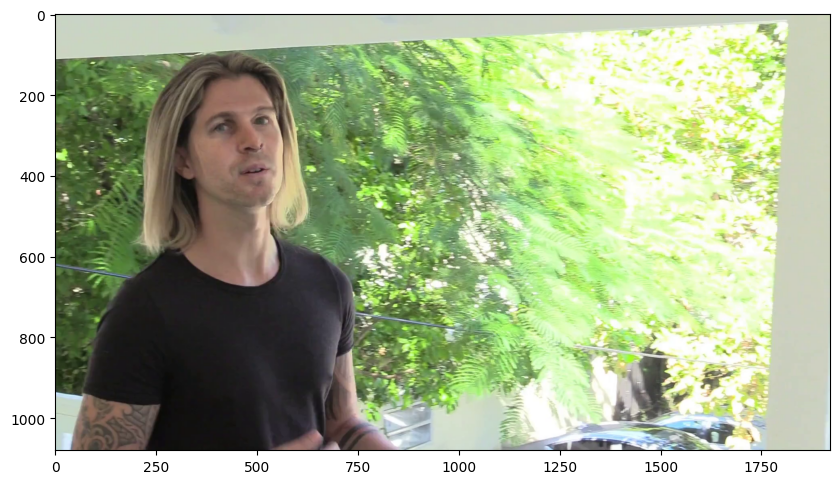

In [19]:
image = image_from_video("/content/drive/MyDrive/DL Project/Dataset/train_sample_videos/aagfhgtpmv.mp4")

In [20]:
import face_recognition

A face is located at pixel location Top: 217, Left: 365, Bottom: 440, Right: 588


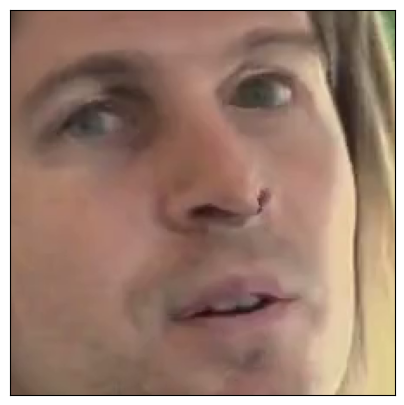

In [21]:
face_locations = face_recognition.face_locations(image)

from PIL import Image


for face_location in face_locations:

  top,right,bottom,left = face_location
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

  face_image = image[top:bottom, left:right]
  fig, ax = plt.subplots(1,1, figsize=(5, 5))
  plt.grid(False)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  ax.imshow(face_image)
